# Predicting Sentiment from Tweets

### Project Overview:
Sentiment analysis is a powerful tool used to understand public sentiment and opinion from social media content, particularly on platforms like Twitter. This project aims to apply machine learning techniques to classify tweets as either positive or negative. By doing so, businesses, researchers, and individuals can better understand public sentiment, helping inform decisions and strategies.

The project utilizes the Twitter dataset provided by the NLTK library, which contains 10,000 labeled tweets. These tweets are evenly divided between positive and negative sentiments, providing a balanced dataset for training and evaluation.

In [568]:
from nltk.corpus import twitter_samples  # sample Twitter dataset from NLTK

# nltk.download('twitter_samples')
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

Number of positive tweets:  5000
Number of negative tweets:  5000


# Clean and Preprocess Tweets

In [569]:
import re


def clean_tweet(tweet):
    # Remove punctuation and make lowercase
    tweet = re.sub(r'[^\w\s]', '', tweet.lower())

    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)

    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'@\w+|#', '', tweet)

    return tweet


In [570]:
from nltk.corpus import stopwords

# nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


def remove_stopwords(tweet):
    return ' '.join([word for word in tweet.split() if word not in stop_words])

In [571]:
from nltk.stem import PorterStemmer


def stem_tweet(tweet):
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in tweet.split()])

In [572]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


def lemmatize_tweet(tweet):
    return lemmatizer.lemmatize(tweet, 'v')

In [573]:
def preprocess_tweet(tweet):
    tweet = clean_tweet(tweet)
    tweet = remove_stopwords(tweet)
    # tweet = stem_tweet(tweet)
    tweet = lemmatize_tweet(tweet)

    return tweet

In [574]:
print(all_positive_tweets[6])
preprocess_tweet(all_positive_tweets[6])

We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI


'dont like keep lovely customers waiting long hope enjoy happy friday lwwf'

In [575]:
positive_tweets = [preprocess_tweet(tweet) for tweet in all_positive_tweets]
negative_tweets = [preprocess_tweet(tweet) for tweet in all_negative_tweets]

# Exploratory Data Analysis

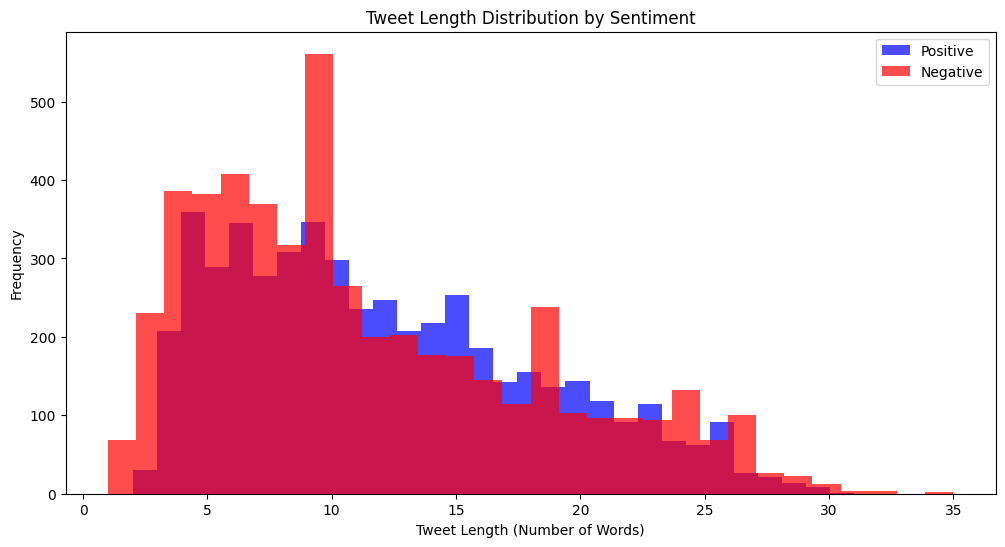

In [576]:
import matplotlib.pyplot as plt

# Calculate tweet lengths for both classes
pos_lengths = [len(tweet.split()) for tweet in all_positive_tweets]
neg_lengths = [len(tweet.split()) for tweet in all_negative_tweets]

# Plotting
plt.figure(figsize=(12, 6))
plt.hist(pos_lengths, bins=30, alpha=0.7, label='Positive', color='blue')
plt.hist(neg_lengths, bins=30, alpha=0.7, label='Negative', color='red')
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Tweet Length (Number of Words)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

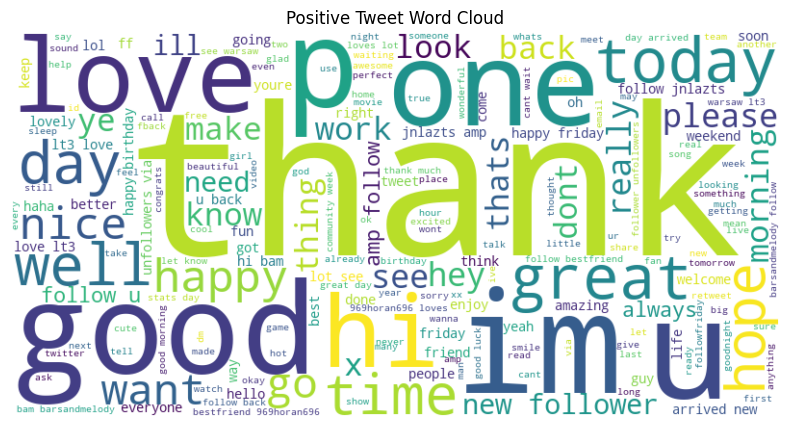

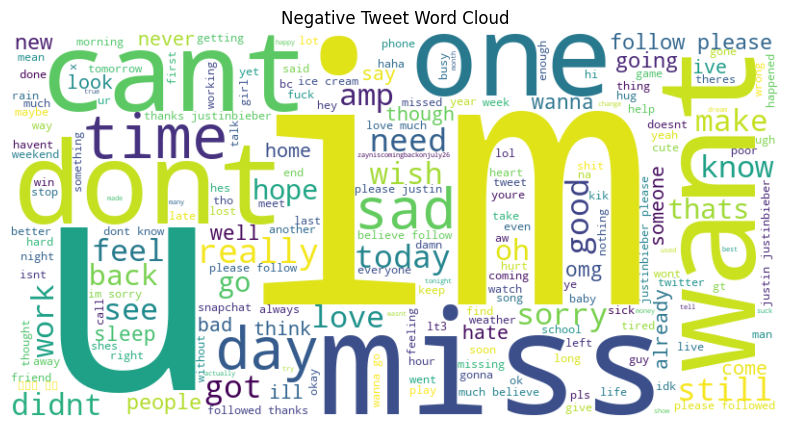

In [577]:
from wordcloud import WordCloud

# Positive Word Cloud
pos_text = ' '.join(positive_tweets)
pos_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.figure(figsize=(10, 5))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title('Positive Tweet Word Cloud')
plt.axis('off')
plt.show()

# Negative Word Cloud
neg_text = ' '.join(negative_tweets)
neg_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neg_text)
plt.figure(figsize=(10, 5))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.title('Negative Tweet Word Cloud')
plt.axis('off')
plt.show()

In [578]:

# count all the word on positive and negative tweets
from collections import Counter

# Count all the words in positive tweets
pos_words = ' '.join(positive_tweets)
pos_words = pos_words.split()
pos_word_count = Counter(pos_words)

# Count all the words in negative tweets
neg_words = ' '.join(negative_tweets)
neg_words = neg_words.split()
neg_word_count = Counter(neg_words)

print('Unique Positive words: ', len(pos_word_count))
print('Unique Negative words: ', len(neg_word_count))

print("Most common positive words: ", pos_word_count.most_common(5))
print("Most common negative words: ", neg_word_count.most_common(5))

Unique Positive words:  12190
Unique Negative words:  10169
Most common positive words:  [('thanks', 390), ('follow', 308), ('love', 274), ('thank', 248), ('u', 241)]
Most common negative words:  [('im', 473), ('please', 272), ('miss', 240), ('dont', 232), ('cant', 230)]


# Train and Test Data Split

In [579]:
from sklearn.model_selection import train_test_split

# Combine tweets and labels
all_tweets = positive_tweets + negative_tweets
labels = [1] * len(positive_tweets) + [0] * len(negative_tweets)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_tweets, labels, test_size=0.2, random_state=42)

In [580]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


def vectorizer(vectorizer_name):
    if vectorizer_name == 'Tfidf':
        vectorizer = TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2)
        )
    elif vectorizer_name == 'Count':
        vectorizer = CountVectorizer()
    else:
        raise ValueError("Invalid vectorizer name")

    return vectorizer

In [581]:

# vectorizer = TfidfVectorizer(
#     max_features=5000,
#     # ngram_range=(1,2)
# )
vectorizer = vectorizer('Count')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_test_tfidf)

  (0, 5039)	1
  (0, 8708)	1
  (0, 14428)	1
  (1, 6053)	1
  (1, 14256)	1
  (2, 1865)	1
  (2, 8454)	1
  (2, 8660)	1
  (2, 8708)	1
  (2, 8746)	1
  (3, 527)	1
  (3, 1865)	1
  (3, 8472)	1
  (3, 10446)	1
  (3, 15153)	1
  (3, 16079)	1
  (4, 4807)	1
  (4, 5464)	1
  (4, 5828)	1
  (4, 6860)	1
  (4, 9328)	1
  (4, 10173)	1
  (4, 10484)	2
  (4, 14595)	1
  (4, 14607)	2
  :	:
  (1996, 15430)	1
  (1996, 15473)	1
  (1997, 869)	1
  (1997, 2244)	1
  (1997, 2600)	1
  (1997, 6499)	1
  (1997, 10014)	1
  (1997, 10985)	2
  (1997, 12095)	1
  (1997, 12549)	1
  (1997, 12644)	1
  (1997, 14278)	1
  (1997, 16107)	1
  (1998, 6097)	1
  (1998, 9831)	1
  (1999, 1728)	1
  (1999, 3994)	1
  (1999, 4483)	1
  (1999, 5042)	1
  (1999, 5661)	1
  (1999, 5874)	1
  (1999, 6682)	1
  (1999, 8765)	1
  (1999, 15430)	1
  (1999, 15469)	1


# Model Training and Evaluation

In [582]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Configurable model choices
def train_model(model_name='LogisticRegression', X_train=X_train_tfidf, y_train=y_train):
    model_dict = {
        'MultinomialNB': MultinomialNB(),
        'BernoulliNB': BernoulliNB(),
        'LogisticRegression': LogisticRegression(max_iter=200),
        'SVM': SVC(kernel='linear', probability=True),
        'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
    }

    if model_name not in model_dict:
        raise ValueError("Invalid model name")

    # Train the selected model
    model = model_dict[model_name]
    model.fit(X_train, y_train)

    return model

In [583]:
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = train_model('SVM')

In [584]:
# Predict on the test set
y_pred_test = model.predict(X_test_tfidf)
y_pred_train = model.predict(X_train_tfidf)

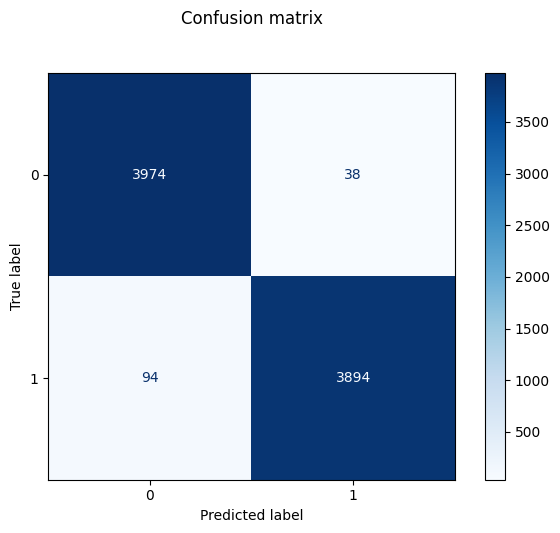

In [585]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.show()

In [586]:
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Data Accuracy: {accuracy * 100:.2f}%")

test_data_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Data Accuracy: {test_data_accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_train, y_pred_train))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

Train Data Accuracy: 98.35%
Test Data Accuracy: 74.40%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4012
           1       0.99      0.98      0.98      3988

    accuracy                           0.98      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.98      0.98      0.98      8000

Confusion Matrix:
[[3974   38]
 [  94 3894]]
